Key questions to answer:
1. What are the trends in movie release dates and what impact do they have on revenue?
2. Is there a relationship between production budget and profitability and ROI of a movie? i.e Does a higher production budget automatically result to a higher profitability and vice versa.....

#### Importing the libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style()


#### Loading the Dataset

In [9]:
merged_df = pd.read_csv("merged_df_cleaned", parse_dates = ["theater_date", "dvd_date", "release_date"])

FileNotFoundError: [Errno 2] No such file or directory: 'merged_df_cleaned'

#### 1. What are the trends in movie release dates and what impact do they have on revenue?

In [ ]:
#Extract month from the release date column
merged_df["month"] = merged_df["release_date"].dt.month

#Extract year from the release date column
merged_df["year"] = merged_df["release_date"].dt.year


# Group by month and calculate the domestic and worldwide gross
monthly_gross_avg = merged_df.groupby('month').agg({'domestic_gross': ['mean', 'count'],
'worldwide_gross': 'mean'}).round(2)

# Renaming column names
monthly_gross_avg.columns = ['avg_domestic', 'movie_count', 'avg_worldwide']

monthly_gross_avg = monthly_gross_avg.reset_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


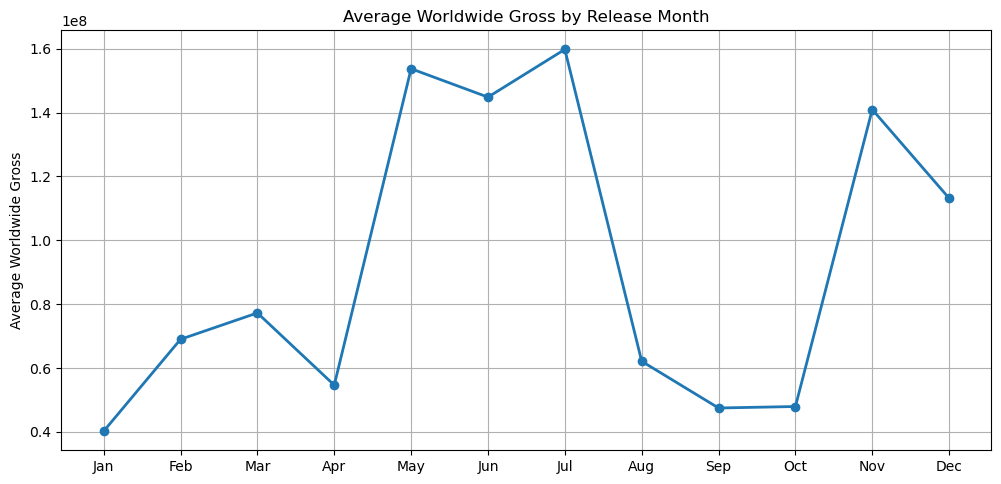

In [ ]:
# Create visualization
plt.figure(figsize=(12, 12))

#Plot of Average Worldwide Gross by Month
x = months
y = monthly_gross_avg['avg_worldwide']
plt.subplot(2, 1, 1)
plt.plot(x, y,  marker='o', linewidth=2)
plt.title('Average Worldwide Gross by Release Month')
plt.ylabel('Average Worldwide Gross')
plt.grid(True)

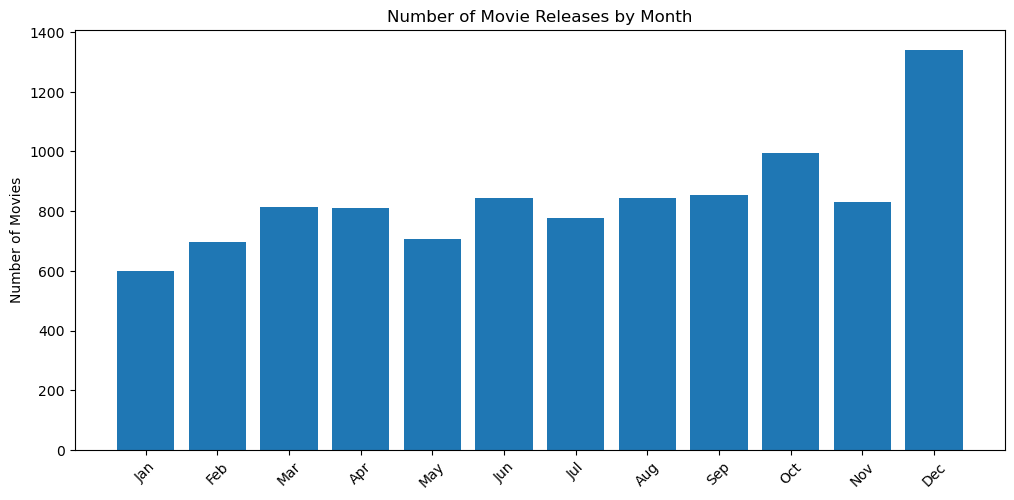

In [ ]:
#Plot of Number of Movies Released by Month
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 2)
plt.bar(x, monthly_gross_avg['movie_count'])
plt.title('Number of Movie Releases by Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Print monthly statistics
print("Monthly Revenue Analysis:")

print(monthly_gross_avg)

Monthly Revenue Analysis:
    month  avg_domestic  movie_count  avg_worldwide
0       1   21641995.71          600   4.018672e+07
1       2   34455948.28          695   6.897808e+07
2       3   38723667.56          814   7.724391e+07
3       4   25148901.95          809   5.461725e+07
4       5   64532859.74          706   1.537543e+08
5       6   68064587.33          843   1.448574e+08
6       7   67248599.89          777   1.598247e+08
7       8   32424391.67          845   6.209446e+07
8       9   23278486.38          854   4.745250e+07
9      10   23424807.58          996   4.792050e+07
10     11   61960332.70          832   1.409789e+08
11     12   50618389.29         1340   1.131693e+08


In [ ]:
#Calculate yearly trends
yearly_gross = merged_df.groupby('year').agg({
    'worldwide_gross': ['mean', 'count']
}).round(2)

#Rename the columns
yearly_gross.columns = ['avg_worldwide', 'movie_count']

yearly_gross = yearly_gross.reset_index()

In [ ]:
# Plot yearly trend
plt.figure(figsize=(15, 6))
plt.plot(yearly_gross['year'], yearly_gross['avg_worldwide'], marker='o')
plt.title('Average Worldwide Gross by Year')
plt.xlabel('Year')
plt.ylabel('Average Worldwide Gross')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#correlation between release month and worldwide gross
corr = merged_df["month"].corr(merged_df["worldwide_gross"])

print(f"There is a correlation of {corr:.4f} between the movie release month and the worldwide gross")

There is a correlation of 0.0544 between the movie release month and the worldwide gross


#### Findings

* Months between (May-July) consistently show the highest average worldwide gross
  
* July is the most profitable month with an average worldwide gross of 159.8M USD
  
* May and June follow closely with 153.7M USD and 144.9M USD respectively
  
* October has the highest number of movies released (996 movies) despite having lower average revenues compared to other months 
  
* The winter holiday season (November-December) also shows strong performance
  
* January and September show the lowest average revenues
  
The findings suggests that biggest budget films are released during the months between (May-July). This may be due to the activities during that period like summer vacations, holiday leisure time etc


### Recommendations


Based on the findings regarding movie release patterns and their impact on worldwide gross revenues, here are some recommendations I am making to our company:


1. High-Budget Releases in (May-July) period: I am recomending to the company to prioritize releasing high-budget films during the months of (May-July) because during this time people are more likely to engage in cinema outings. July is the most profitable month and therefore aiming at the May-July timeframe could maximize on box office revenue.
   
2. Focused Marketing: I would also recommend to the company to increase marketing efforts leading up to and during these months to maximize opening-weekend success and overall revenue. 

3. Release High-Potential Films in November-December: This is the holiday season and it shows strong performance in average revenue. I would recommend to the company to release family-oriented films and holiday-themed movies to take advantage of the holiday crowds.

4. Low-Cost, High-Return Genres: Finally I am recommending to the company to utilize lower budget or experimental films in months like January and September which have lower average revenue to maintain a consistent presence.

